In [1]:
import pandas as pd
import numpy as np
import pickle
import matplotlib.pyplot as plt
from pandas_profiling import ProfileReport
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, roc_auc_score,roc_curve, confusion_matrix
import seaborn as sns

In [2]:
df = sns.load_dataset('titanic')

In [3]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [8]:
df.tail(10)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
881,0,3,male,33.0,0,0,7.8958,S,Third,man,True,NaN,Southampton,no,True
882,0,3,female,22.0,0,0,10.5167,S,Third,woman,False,NaN,Southampton,no,True
883,0,2,male,28.0,0,0,10.5000,S,Second,man,True,NaN,Southampton,no,True
884,0,3,male,25.0,0,0,7.0500,S,Third,man,True,NaN,Southampton,no,True
885,0,3,female,39.0,0,5,29.1250,Q,Third,woman,False,NaN,Queenstown,no,False
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True
890,0,3,male,32.0,0,0,7.7500,Q,Third,man,True,NaN,Queenstown,no,True


In [4]:
df['alive'].unique()

array(['no', 'yes'], dtype=object)

In [5]:
df['alone'].unique()

array([False,  True])

In [6]:
df['survived'].unique()

array([0, 1], dtype=int64)

In [9]:
df['who'].unique()

array(['man', 'woman', 'child'], dtype=object)

In [10]:
df['deck'].unique()

[NaN, 'C', 'E', 'G', 'D', 'A', 'B', 'F']
Categories (7, object): ['A', 'B', 'C', 'D', 'E', 'F', 'G']

In [7]:
df.dtypes

survived          int64
pclass            int64
sex              object
age             float64
sibsp             int64
parch             int64
fare            float64
embarked         object
class          category
who              object
adult_male         bool
deck           category
embark_town      object
alive            object
alone              bool
dtype: object

In [12]:
# here deleting some unneccessary column.
df.drop(columns = ['class', 'who', 'adult_male', 'deck', 'embark_town', 'alive', 'alone'], inplace = True)

In [13]:
# This is the final dataset. now playing with this dataset.
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   survived  891 non-null    int64  
 1   pclass    891 non-null    int64  
 2   sex       891 non-null    object 
 3   age       714 non-null    float64
 4   sibsp     891 non-null    int64  
 5   parch     891 non-null    int64  
 6   fare      891 non-null    float64
 7   embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 55.8+ KB


In [17]:
# handling sex and embarked column because it's not in numeric form
df['sex'].unique()

array(['male', 'female'], dtype=object)

In [18]:
df['sex'].value_counts()

male      577
female    314
Name: sex, dtype: int64

In [19]:
# Mapping these two value
df['sex'] = df['sex'].map({'male' : 1, 'female' : 0})

In [20]:
df.head(2)

,survived,pclass,sex,age,sibsp,parch,fare,embarked
0,0,3,1,22.0,1,0,7.2500,S
1,1,1,0,38.0,1,0,71.2833,C


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   survived  891 non-null    int64  
 1   pclass    891 non-null    int64  
 2   sex       891 non-null    int64  
 3   age       714 non-null    float64
 4   sibsp     891 non-null    int64  
 5   parch     891 non-null    int64  
 6   fare      891 non-null    float64
 7   embarked  889 non-null    object 
dtypes: float64(2), int64(5), object(1)
memory usage: 55.8+ KB


In [22]:
df['embarked'].unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [23]:
df['embarked'].isnull().sum()

2

In [24]:
df['embarked'].value_counts()

S    644
C    168
Q     77
Name: embarked, dtype: int64

In [26]:
df['embarked'] = df['embarked'].map({'S': 2, 'C': 1, 'Q': 0})

In [27]:
df.head(3)

,survived,pclass,sex,age,sibsp,parch,fare,embarked
0,0,3,1,22.0,1,0,7.2500,2.0
1,1,1,0,38.0,1,0,71.2833,1.0
2,1,3,0,26.0,0,0,7.9250,2.0


In [28]:
# Now all are in numeric format
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   survived  891 non-null    int64  
 1   pclass    891 non-null    int64  
 2   sex       891 non-null    int64  
 3   age       714 non-null    float64
 4   sibsp     891 non-null    int64  
 5   parch     891 non-null    int64  
 6   fare      891 non-null    float64
 7   embarked  889 non-null    float64
dtypes: float64(3), int64(5)
memory usage: 55.8 KB


In [29]:
df.isnull().sum()

survived      0
pclass        0
sex           0
age         177
sibsp         0
parch         0
fare          0
embarked      2
dtype: int64

In [30]:
df['age'] = df['age'].fillna(df['age'].mean())

In [33]:
df['embarked'] = df['embarked'].fillna(2)

In [34]:
df.isnull().sum()

survived    0
pclass      0
sex         0
age         0
sibsp       0
parch       0
fare        0
embarked    0
dtype: int64

In [35]:
df['embarked'].unique()

array([2., 1., 0.])

In [36]:
# our dependent feature is survived and independent feature are except survived.
pf = ProfileReport(df)

In [37]:
pf.to_widgets()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render widgets:   0%|          | 0/1 [00:00<?, ?it/s]

In [38]:
df['sibsp'].unique()

array([1, 0, 3, 4, 2, 5, 8], dtype=int64)

In [39]:
df['sibsp'].value_counts()

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: sibsp, dtype: int64

In [41]:
df.shape

(891, 8)

<AxesSubplot:>

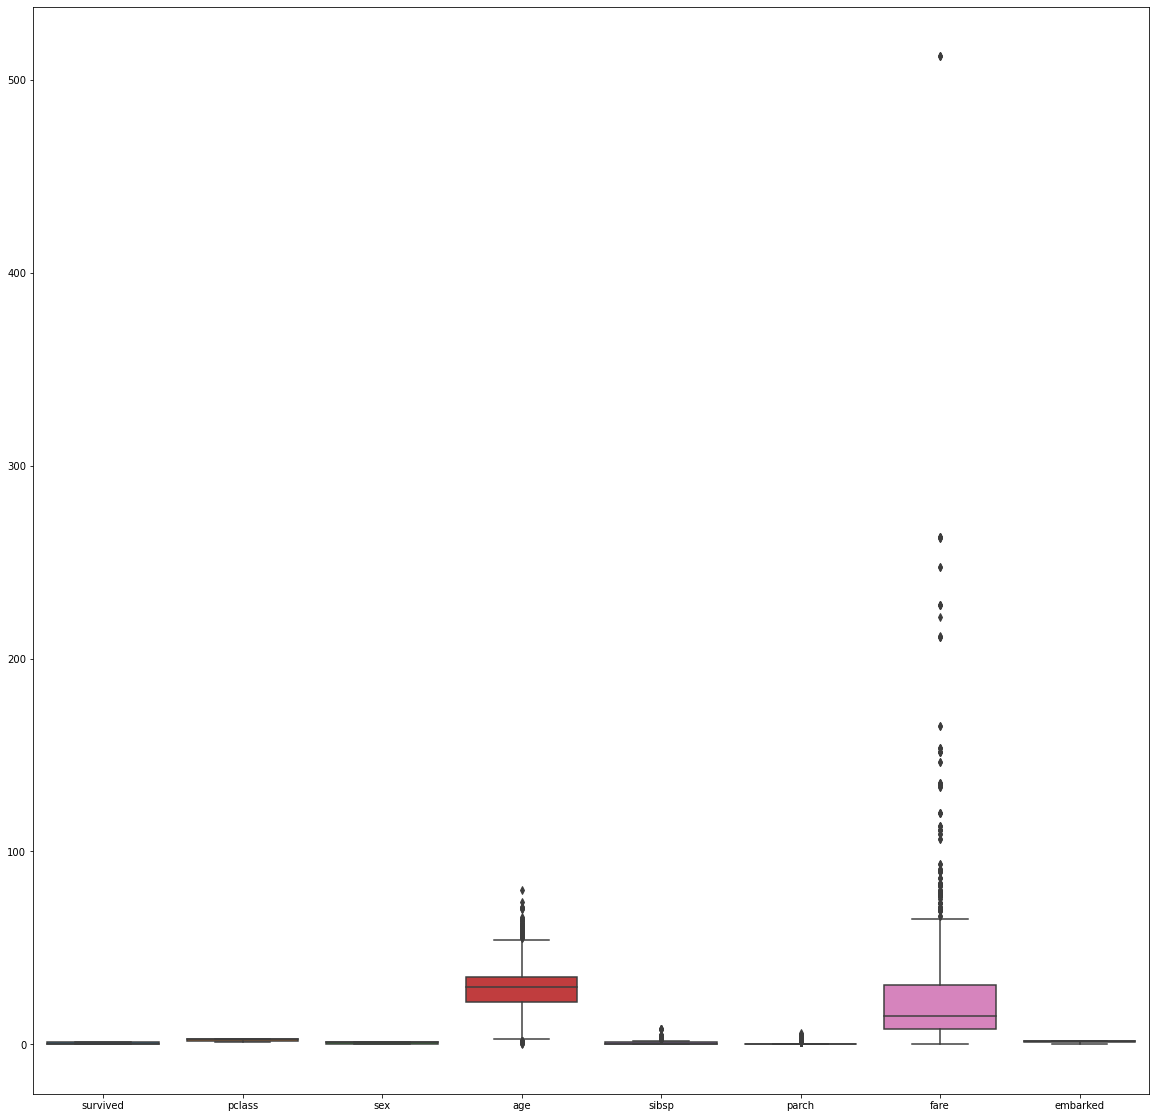

In [42]:
# check if outlier present or not
fig,ax = plt.subplots(figsize = (20,20))
sns.boxplot(data  = df, ax = ax)

In [50]:
df['sibsp'] = df['sibsp'].replace(0, df['sibsp'].mean())

In [51]:
df['parch'].unique()

array([0, 1, 2, 5, 3, 4, 6], dtype=int64)

In [52]:
df['parch'] = df['parch'].replace(0, df['parch'].mean())

In [53]:
df['fare'].unique()

array([  7.25      ,  71.2833    ,   7.925     ,  53.1       ,
         8.05      ,   8.4583    ,  51.8625    ,  21.075     ,
        11.1333    ,  30.0708    ,  16.7       ,  26.55      ,
        31.275     ,   7.8542    ,  16.        ,  29.125     ,
        13.        ,  18.        ,   7.225     ,  26.        ,
         8.0292    ,  35.5       ,  31.3875    , 263.        ,
         7.8792    ,   7.8958    ,  27.7208    , 146.5208    ,
         7.75      ,  10.5       ,  82.1708    ,  52.        ,
         7.2292    ,  11.2417    ,   9.475     ,  21.        ,
        41.5792    ,  15.5       ,  21.6792    ,  17.8       ,
        39.6875    ,   7.8       ,  76.7292    ,  61.9792    ,
        27.75      ,  46.9       ,  80.        ,  83.475     ,
        27.9       ,  15.2458    ,   8.1583    ,   8.6625    ,
        73.5       ,  14.4542    ,  56.4958    ,   7.65      ,
        29.        ,  12.475     ,   9.        ,   9.5       ,
         7.7875    ,  47.1       ,  15.85      ,  34.37

In [54]:
df['fare'] = df['fare'].replace(0, df['fare'].mean())

In [55]:
pf1 = ProfileReport(df)

In [56]:
pf1.to_widgets()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render widgets:   0%|          | 0/1 [00:00<?, ?it/s]

<AxesSubplot:>

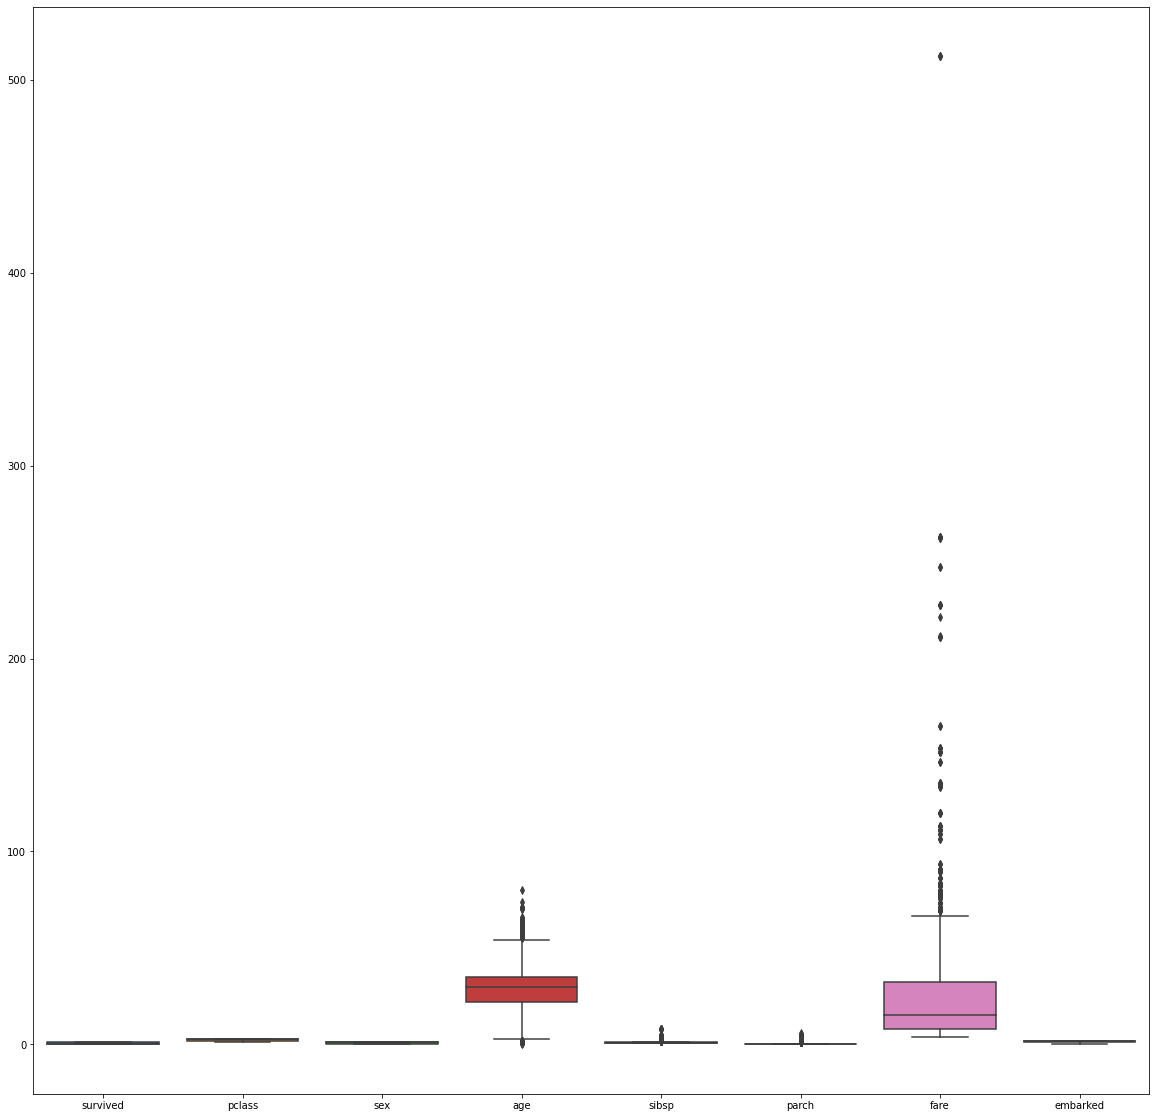

In [57]:
fig, ax = plt.subplots(figsize = (20,20))
sns.boxplot(data = df, ax = ax)

In [67]:
# Handling outlier using quantile
q = df['age'].quantile(0.99)
df_new = df[df['age'] < q]

q = df['fare'].quantile(0.99)
df_new = df_new[df_new['fare'] < q]

<AxesSubplot:>

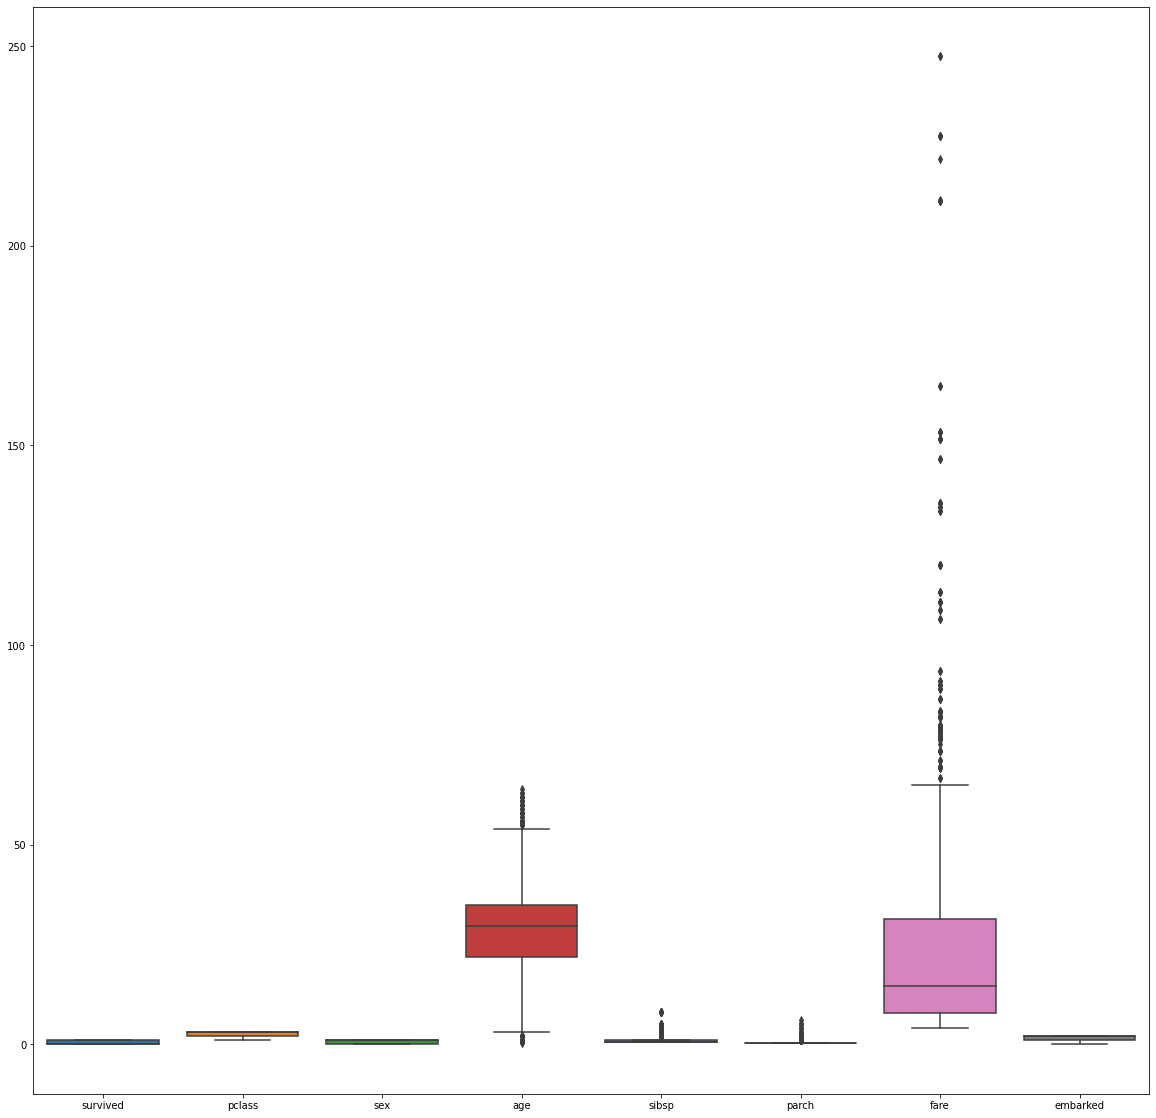

In [68]:
fig, ax = plt.subplots(figsize = (20,20))
sns.boxplot(data = df_new, ax = ax)

In [63]:
df_new.shape

(828, 8)

In [69]:
df.head(2)

,survived,pclass,sex,age,sibsp,parch,fare,embarked
0,0,3,1,22.0,1.0,0.381594,7.2500,2.0
1,1,1,0,38.0,1.0,0.381594,71.2833,1.0


In [70]:
df.dtypes

survived      int64
pclass        int64
sex           int64
age         float64
sibsp       float64
parch       float64
fare        float64
embarked    float64
dtype: object

In [71]:
x = df.drop(columns = 'survived')

In [73]:
x.head(1)

,pclass,sex,age,sibsp,parch,fare,embarked
0,3,1,22.0,1.0,0.381594,7.25,2.0


In [74]:
y = df['survived']

In [75]:
#splitting the data
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=122)

In [78]:
model1 = LogisticRegression(verbose=1)

In [79]:
model1.fit(x_train, y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


LogisticRegression(verbose=1)

In [80]:
y_test

486    1
327    1
103    0
189    0
807    0
      ..
885    0
47     1
8      1
313    0
705    0
Name: survived, Length: 179, dtype: int64

In [84]:
lbfgs_solver_pred = model1.predict(x_test)

In [85]:
lbfgs_solver_pred

array([1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1,
       1, 0, 0], dtype=int64)

In [86]:
confusion_matrix(y_test, lbfgs_solver_pred)

array([[96, 21],
       [22, 40]], dtype=int64)

In [88]:
roc_auc_score(y_test, lbfgs_solver_pred)

0.7328370554177005

In [89]:
accuracy_score(y_test, lbfgs_solver_pred)

0.7597765363128491

In [90]:
# Now using liblinear solver
model2 = LogisticRegression(verbose=1, solver='liblinear')

In [91]:
model2.fit(x_train, y_train)

[LibLinear]

LogisticRegression(solver='liblinear', verbose=1)

In [92]:
liblinear_solver_pred = model2.predict(x_test)

In [93]:
liblinear_solver_pred

array([1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0,
       0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0,
       1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 0], dtype=int64)

In [94]:
y_test

486    1
327    1
103    0
189    0
807    0
      ..
885    0
47     1
8      1
313    0
705    0
Name: survived, Length: 179, dtype: int64

In [95]:
confusion_matrix(y_test, liblinear_solver_pred)

array([[100,  17],
       [ 24,  38]], dtype=int64)

In [96]:
accuracy_score(y_test, liblinear_solver_pred)

0.770949720670391

In [97]:
roc_auc_score(y_test, liblinear_solver_pred)

0.7338020402536531

In [98]:
# Now using saga solver
model3 = LogisticRegression(verbose=1, solver='saga')

In [99]:
model3.fit(x_train, y_train)

max_iter reached after 0 seconds


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
C:\Users\ts-sachin.bhumihar\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


LogisticRegression(solver='saga', verbose=1)

In [100]:
saga_solver_pred = model3.predict(x_test)

In [101]:
saga_solver_pred

array([1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0], dtype=int64)

In [102]:
y_test

486    1
327    1
103    0
189    0
807    0
      ..
885    0
47     1
8      1
313    0
705    0
Name: survived, Length: 179, dtype: int64

In [103]:
confusion_matrix(y_test, saga_solver_pred)

array([[105,  12],
       [ 52,  10]], dtype=int64)

In [104]:
accuracy_score(y_test, saga_solver_pred)

0.6424581005586593

In [105]:
roc_auc_score(y_test, saga_solver_pred)

0.5293631100082713